In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier


In [4]:
df_train = pd.read_csv('combined_train_with_labels.csv.gz')

df_test = pd.read_csv('combined_test_with_labels.csv.gz')

In [6]:
df_train.describe()

,energy_label,tp0,ED,HWP,LQ80,PPR,SCA,ND80,current_skewness,tail_slope_no_pz,...,tdrift50,tdrift99,tfr,peak_count,gbn,bpr,AvsE,GradAreaRatio,GradWidthMain,HFER
count,1.040000e+06,1.040000e+06,1.040000e+06,1.040000e+06,1.040000e+06,1.040000e+06,1.040000e+06,1.040000e+06,1.040000e+06,1.040000e+06,...,1.039995e+06,1.039995e+06,1.040000e+06,1.040000e+06,1.040000e+06,1.040000e+06,1.040000e+06,1.040000e+06,1.040000e+06,1.040000e+06
mean,6.381633e+02,9.516434e+02,3.406036e+03,2.054120e+03,-6.978950e+05,6.895844e-01,3.572992e-02,3.009126e-03,2.956637e+00,-9.783858e+03,...,6.981389e+01,1.131437e+02,1.495163e-01,5.104236e+00,1.777303e+00,6.049704e-02,4.964875e-01,4.091337e+11,6.792718e+01,3.643588e-02
std,6.704271e+02,1.895332e+01,7.735526e+00,1.296720e+02,7.301064e+05,2.072402e-02,6.330801e-03,4.127131e-02,5.088982e-01,1.268292e+03,...,2.934827e+01,7.287391e+01,3.987192e-02,7.352031e+00,1.174284e+00,2.152323e-02,9.173632e-02,1.401446e+12,2.442059e+01,8.420477e-03
min,0.000000e+00,7.100000e+01,3.074000e+03,7.200000e+01,-5.846630e+06,1.672960e-01,2.676319e-02,0.000000e+00,-1.364742e+00,-1.400795e+05,...,0.000000e+00,9.000000e+00,1.968922e-02,1.000000e+00,6.992497e-01,3.636530e-02,3.150645e-02,1.000000e+00,5.000000e+00,2.650746e-02
25%,2.383612e+02,9.420000e+02,3.404000e+03,2.032000e+03,-6.984126e+05,6.884366e-01,3.452545e-02,0.000000e+00,2.665699e+00,-1.051588e+04,...,5.400000e+01,8.600000e+01,1.408390e-01,1.000000e+00,1.116426e+00,5.533778e-02,4.353313e-01,1.000000e+00,5.100000e+01,3.454584e-02
50%,3.411866e+02,9.540000e+02,3.407000e+03,2.066000e+03,-3.769554e+05,6.934395e-01,3.480813e-02,0.000000e+00,3.158948e+00,-9.965724e+03,...,6.900000e+01,1.020000e+02,1.457415e-01,2.000000e+00,1.321930e+00,6.133205e-02,5.268103e-01,1.000000e+00,6.500000e+01,3.505329e-02
75%,6.300128e+02,9.640000e+02,3.410000e+03,2.099000e+03,-2.654720e+05,6.974714e-01,3.524030e-02,0.000000e+00,3.314185e+00,-9.329837e+03,...,8.300000e+01,1.210000e+02,1.509235e-01,5.000000e+00,1.908089e+00,6.423424e-02,5.653386e-01,6.588437e+01,8.200000e+01,3.580735e-02
max,4.998508e+03,1.352000e+03,3.790000e+03,3.796000e+03,3.675492e+07,9.741713e-01,2.028693e-01,2.193201e+00,5.955492e+00,5.081424e+04,...,2.839000e+03,2.919000e+03,3.990051e+00,5.500000e+01,3.667323e+01,2.569411e+00,9.706884e-01,7.968905e+12,3.910000e+02,2.743541e-01


In [7]:
df_test.describe()

,energy_label,tp0,ED,HWP,LQ80,PPR,SCA,ND80,total_power,tail_slope,...,tdrift50,tdrift99,tfr,peak_count,gbn,bpr,AvsE,GradAreaRatio,GradWidthMain,HFER
count,390000.000000,390000.000000,390000.000000,390000.000000,3.900000e+05,390000.000000,390000.000000,390000.000000,390000.000000,390000.000000,...,390000.000000,390000.000000,390000.000000,390000.000000,390000.000000,390000.000000,390000.000000,3.900000e+05,390000.000000,390000.000000
mean,636.420597,951.667418,3406.022251,2053.719892,-6.961829e+05,0.689568,0.035721,0.002938,8.918050,10.172294,...,69.810474,112.998205,0.149470,5.092323,1.778528,0.060501,0.496437,4.061964e+11,67.902682,0.036423
std,669.051804,18.715776,7.745847,130.787881,7.275291e+05,0.020824,0.006291,0.040122,0.800205,372.773015,...,30.157888,72.299817,0.038967,7.320057,1.179948,0.021937,0.091690,1.396748e+12,24.343887,0.008374
min,0.000000,105.000000,3194.000000,18.000000,-5.045836e+06,0.119332,0.029060,0.000000,3.989967,-23687.071094,...,0.000000,31.000000,0.026388,1.000000,0.689202,0.036675,0.031747,1.000000e+00,5.000000,0.028515
25%,238.364583,942.000000,3404.000000,2032.000000,-6.942430e+05,0.688435,0.034525,0.000000,8.436952,-1.089048,...,54.000000,86.000000,0.140847,1.000000,1.116218,0.055314,0.434686,1.000000e+00,51.000000,0.034545
50%,341.175226,954.000000,3407.000000,2066.000000,-3.769012e+05,0.693434,0.034808,0.000000,8.751684,1.719824,...,69.000000,103.000000,0.145750,2.000000,1.321458,0.061334,0.526955,1.000000e+00,65.000000,0.035055
75%,624.133505,964.000000,3410.000000,2099.000000,-2.655630e+05,0.697469,0.035238,0.000000,9.273502,7.078511,...,83.000000,121.000000,0.150928,5.000000,1.904600,0.064239,0.565397,6.574662e+01,82.000000,0.035810
max,4177.604856,1351.000000,3796.000000,3794.000000,6.259656e+04,0.986577,0.192336,1.961100,10.722037,52359.208420,...,2841.000000,2878.000000,2.903741,53.000000,14.526829,2.387268,0.895246,8.081810e+12,363.000000,0.264706


In [ ]:
print("train shape:", df_train.shape)
print("test shape:", df_test.shape)

print("train unique ids:", df_train["id"].nunique())
print("test unique ids:", df_test["id"].nunique())

print("any duplicate ids in train:", df_train["id"].duplicated().any())
print("any duplicate ids in test:", df_test["id"].duplicated().any())

print("null counts train (top 10):\n", df_train.isna().sum().sort_values(ascending=False).head(10))


train shape: (1040000, 33)
test shape: (390000, 33)
train unique ids: 1040000
test unique ids: 390000
any duplicate ids in train: False
any duplicate ids in test: False
null counts train (top 10):
 tdrift99               5
tdrift50               5
tdrift10               5
id                     0
energy_label           0
psd_label_lq           0
psd_label_low_avse     0
psd_label_high_avse    0
psd_label_dcr          0
LQ80                   0
dtype: int64


In [9]:
type(df_train['psd_label_dcr'][1])

numpy.bool

In [10]:
print(df_train.columns)


Index(['id', 'energy_label', 'psd_label_low_avse', 'psd_label_high_avse',
       'psd_label_dcr', 'psd_label_lq', 'tp0', 'ED', 'HWP', 'LQ80', 'PPR',
       'SCA', 'ND80', 'current_skewness', 'tail_slope_no_pz',
       'spectral_centroid_power', 'current_kurtosis', 'tail_slope',
       'total_power', 'time_to_main_peak', 'time_to_peak', 'current_width',
       'tdrift10', 'tdrift50', 'tdrift99', 'tfr', 'peak_count', 'gbn', 'bpr',
       'AvsE', 'GradAreaRatio', 'GradWidthMain', 'HFER'],
      dtype='object')


In [13]:
print(df_test.columns)

Index(['id', 'energy_label', 'psd_label_low_avse', 'psd_label_high_avse',
       'psd_label_dcr', 'psd_label_lq', 'tp0', 'ED', 'HWP', 'LQ80', 'PPR',
       'SCA', 'ND80', 'total_power', 'tail_slope', 'time_to_main_peak',
       'current_skewness', 'tail_slope_no_pz', 'current_kurtosis',
       'time_to_peak', 'spectral_centroid_power', 'current_width', 'tdrift10',
       'tdrift50', 'tdrift99', 'tfr', 'peak_count', 'gbn', 'bpr', 'AvsE',
       'GradAreaRatio', 'GradWidthMain', 'HFER'],
      dtype='object')


Target Labels

In [14]:
label_cols = [
    "psd_label_lq",
    "psd_label_high_avse",
    "psd_label_low_avse",
    "psd_label_dcr",
]

# MODEL TRAINING

### Preprocessing 

In [17]:
y_col = "psd_label_lq"

drop_cols = [
    "id",
    "energy_label",
    "psd_label_low_avse",
    "psd_label_high_avse",
    "psd_label_dcr",
    "psd_label_lq"
]


X = df_train.drop(columns = drop_cols)
y = df_train[y_col]


In [19]:
X.isna().sum().sort_values(ascending=False)

tdrift10                   5
tdrift99                   5
tdrift50                   5
LQ80                       0
PPR                        0
SCA                        0
ND80                       0
current_skewness           0
tp0                        0
ED                         0
HWP                        0
current_kurtosis           0
spectral_centroid_power    0
tail_slope_no_pz           0
tail_slope                 0
time_to_peak               0
time_to_main_peak          0
total_power                0
current_width              0
tfr                        0
peak_count                 0
gbn                        0
bpr                        0
AvsE                       0
GradAreaRatio              0
GradWidthMain              0
HFER                       0
dtype: int64

In [26]:
rows_with_nan = df_train[df_train.isna().any(axis=1)]
rows_with_nan[["id", "tdrift10", "tdrift50", "tdrift99"]]


,id,tdrift10,tdrift50,tdrift99
253720,253720_train_3,NaN,NaN,NaN
391741,391741_train_6,NaN,NaN,NaN
524458,524458_train_8,NaN,NaN,NaN
586359,586359_train_9,NaN,NaN,NaN
845815,845815_train_13,NaN,NaN,NaN


In [27]:
bad_ids = df_train.loc[df_train["tdrift10"].isna(), "id"].tolist()
bad_ids


['253720_train_3',
 '391741_train_6',
 '524458_train_8',
 '586359_train_9',
 '845815_train_13']

## Eunice Model Training - psd_label_lq

### Logistic Regression

In [38]:

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [39]:
pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),  
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(
        max_iter=2000, # to avoide convergence issues
        class_weight="balanced",
        solver="lbfgs" # supports class weights
    ))
])



In [40]:
# Train
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)

# Evaluate
print("F1:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


F1: 0.8184564911075437
              precision    recall  f1-score   support

       False       0.56      0.65      0.60     60774
        True       0.85      0.79      0.82    147226

    accuracy                           0.75    208000
   macro avg       0.70      0.72      0.71    208000
weighted avg       0.76      0.75      0.76    208000



- Based on the classification report, there is a clear class imbalance where there are significantly more True than False samples. The logistic regression model performs better on the True class achieving precision of 0.85 and recall of 0.79, indicating that most predicted single site events are correct and the model successfully captures the majority of true single site events. Performance on the class is weaker with a precision of 0.56 and recall of 0.65. This suggests that multi site events are more difficult to distinguish and are more frequently misclassified. Overall, the model achieves an F1 score of 0.82 on the True class, which shows a strong baseline performance despite the class imbalance.

- Precision: 
    - When model predicts True, it is correct 85% of the time
    - When model predicts False, it is correct 56% of the time
- Recall: 
    - The model correctly identifies 79% of True events
    - The model correctly identifies 65% of False events




- The baseline Logistic Regression model achieved an F1 score of 0.82 for predicting the psd_label_lq column. 

In [48]:
feature_names = X.columns
coef = pipe.named_steps["lr"].coef_[0]

coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coef
}).sort_values(by="coefficient", ascending=False)

coef_df["abs_coefficient"] = coef_df["coefficient"].abs()

coef_df_sorted = coef_df.sort_values(by = "abs_coefficient", ascending = False)

coef_df_sorted


,feature,coefficient,abs_coefficient
4,PPR,-2.163781,2.163781
7,current_skewness,1.330554,1.330554
1,ED,1.012963,1.012963
13,time_to_main_peak,-0.814635,0.814635
10,current_kurtosis,-0.706731,0.706731
12,total_power,0.621834,0.621834
11,tail_slope,-0.620976,0.620976
9,spectral_centroid_power,-0.538959,0.538959
17,tdrift50,0.458344,0.458344
5,SCA,-0.407508,0.407508


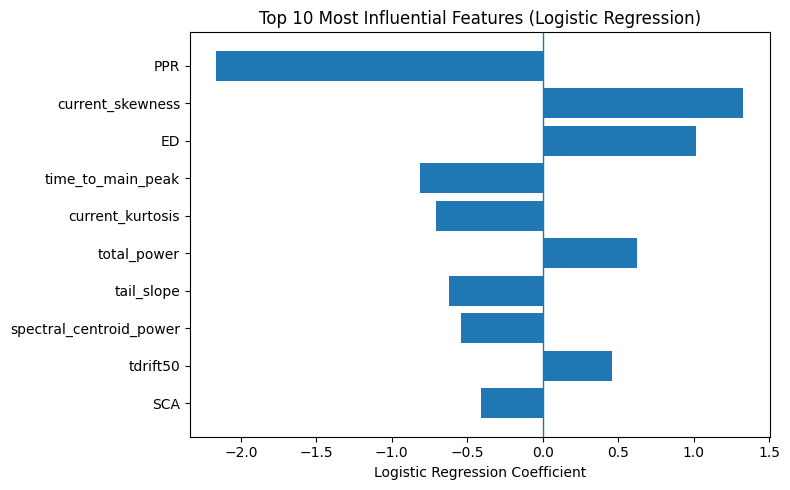

In [49]:
top_n = 10
top_coef = coef_df_sorted.head(top_n)

plt.figure(figsize=(8, 5))
plt.barh(
    top_coef["feature"],
    top_coef["coefficient"]
)
plt.axvline(0, linewidth=1)
plt.xlabel("Logistic Regression Coefficient")
plt.title("Top 10 Most Influential Features (Logistic Regression)")
plt.gca().invert_yaxis()  # strongest at top
plt.tight_layout()
plt.show()

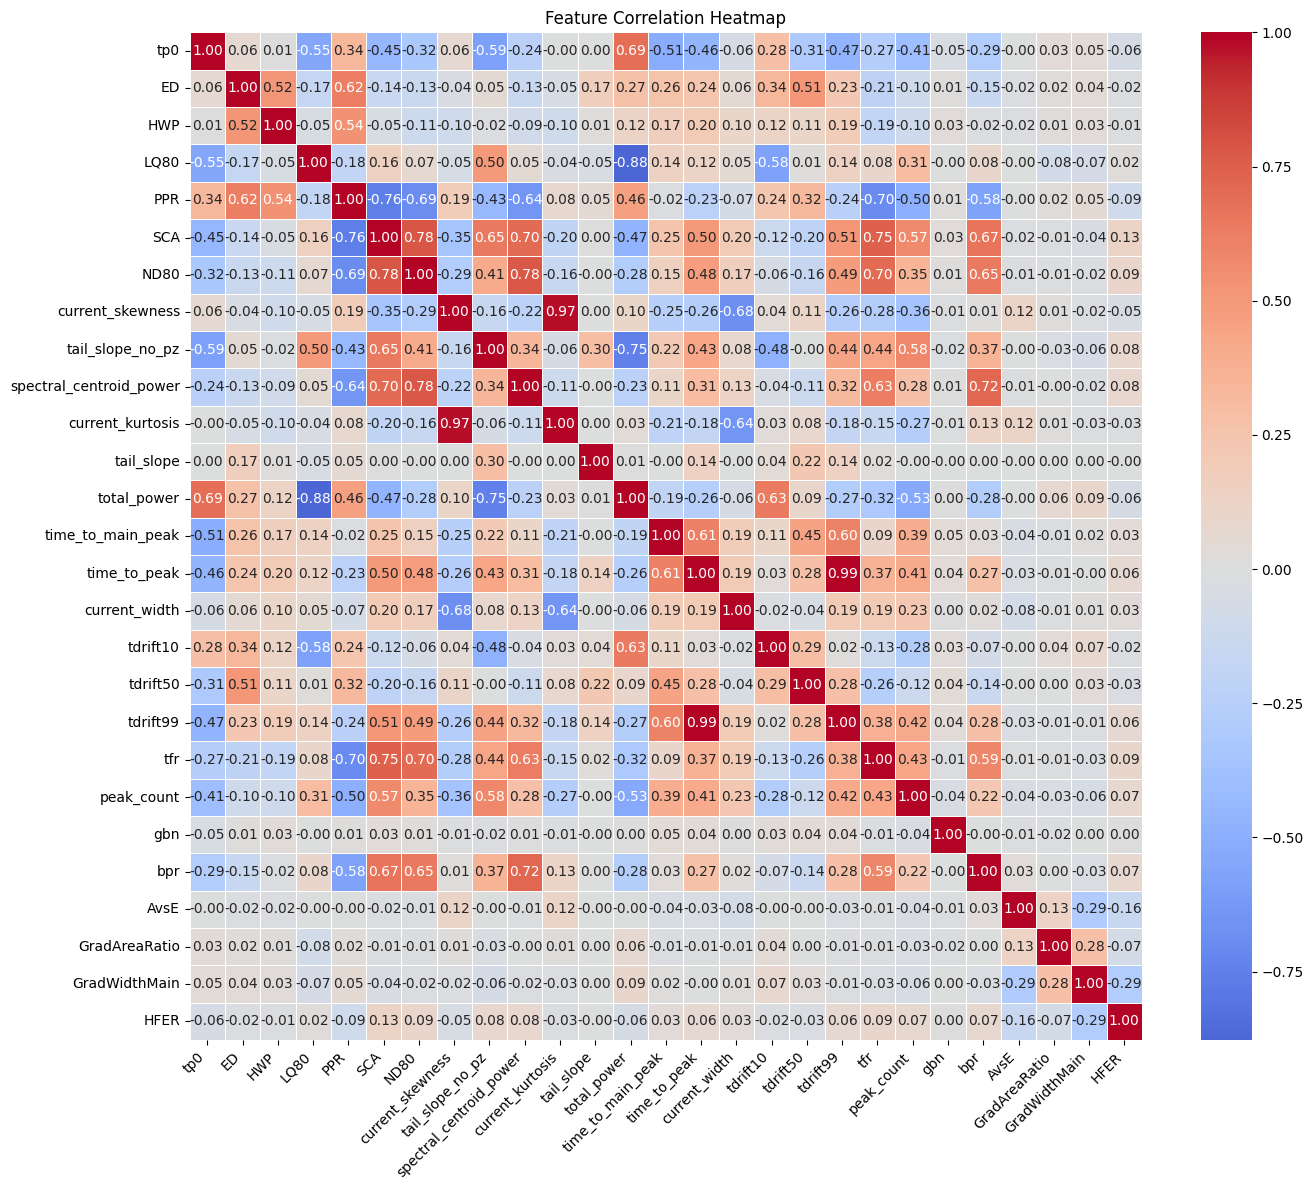

In [46]:
plt.figure(figsize=(14, 12))
sns.heatmap(
    X.corr(),
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    annot=True,
    fmt=".2f"
)
plt.title("Feature Correlation Heatmap")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Random Forest

In [ ]:
rf_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("rf", RandomForestClassifier(
        n_estimators=400,
        max_depth=None,
        min_samples_split=10,
        min_samples_leaf=5,
        max_features="sqrt",
        class_weight="balanced_subsample",
        n_jobs=-1,
        random_state=42
    ))
])

In [ ]:
# Train


# Predict & Evaluate